In [1]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt

pb.pltutils.use_style()

In [1]:


d = 0.2  # [nm] unit cell length
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[0, d])
lattice.add_sublattices(
    ('A', [0, 0])  # add an atom called 'A' at position [0, 0]
)
lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
    ([0, 1], 'A', 'A', t),
    ([1, 0], 'A', 'A', t)
)

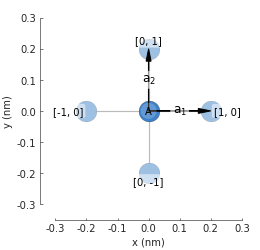

In [4]:
lattice.plot()  # plot the lattice that was just constructed
plt.show()      # standard matplotlib show() function


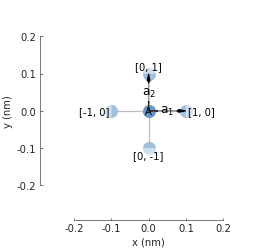

In [5]:
def square_lattice(d, t):
    lat = pb.Lattice(a1=[d, 0], a2=[0, d])
    lat.add_sublattices(('A', [0, 0]))
    lat.add_hoppings(([0, 1], 'A', 'A', t),
                     ([1, 0], 'A', 'A', t))
    return lat

# we can quickly set a shorter unit length `d`
lattice = square_lattice(d=0.1, t=1)
lattice.plot()
plt.show()

In [42]:
d = 0.2  # [nm] unit cell distance
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[d/2,d*3 ** 0.5 /2])
lattice.add_sublattices(('A', [0, d/3**0.5/2]),('B',[0,-d/3**0.5/2]))
lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([0, 1], 'A', 'B', t),
    ([1, -1], 'B', 'A', t)
)

In [33]:
d = 0.2  # [nm] unit cell distance
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[0,3**0.5 * d])
lattice.add_sublattices(('A', [0, d/3**0.5/2]),
                        ('B',[0,-d/3**0.5/2]),
                        #('C',[d/2,(3**0.5 * d)/2+d/3**0.5/2]),
                        #('D',[d/2,(3**0.5 * d)/2-d/3**0.5/2])
                       )
lattice.add_aliases(('C','A',[d/2,(3**0.5 * d)/2+d/3**0.5/2]),
                    ('D','B',[d/2,(3**0.5 * d)/2-d/3**0.5/2])
                   )
lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([0, 0], 'A', 'D', t),
    ([0, 0], 'C', 'D', t),
    ([1, 0], 'D', 'A', t),
    ([1, 1], 'C', 'B', t),
    ([0, 1], 'C', 'B', t),
)

In [40]:
d = 0.2  # [nm] unit cell distance
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[d/2,1.5*d / (3**0.5)])
lattice.add_sublattices(('A', [-d/4,-d / (4*3**0.5)]),
                        ('B',[d/4,d / (4*3**0.5)]))
lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([1, 0], 'B', 'A', t),
    ([0, 1], 'B', 'A', t),
)

In [45]:
d = 0.2  # [nm] unit cell distance
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[-d/2, d*3 ** 0.5 /2], a2=[d/2,d*3 ** 0.5 /2])
lattice.add_sublattices(('A', [0, d/3**0.5/2]),('B',[0,-d/3**0.5/2]))
lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([0, 1], 'A', 'B', t),
    ([1, 0], 'A', 'B', t)
)

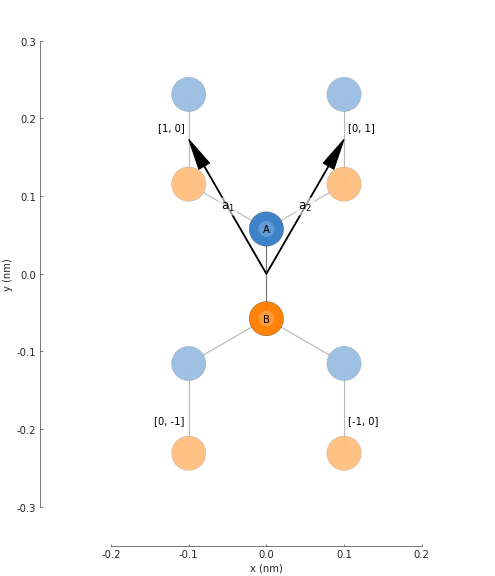

In [46]:
plt.figure(figsize=(10,10))
lattice.plot()
plt.show()

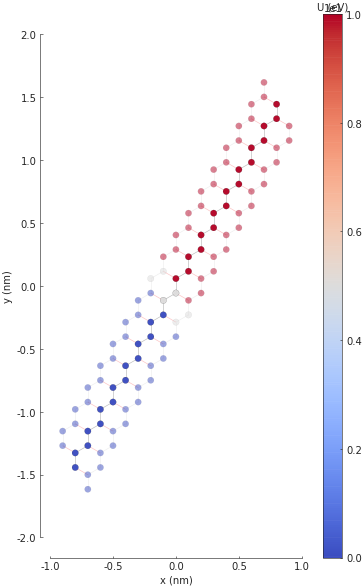

In [50]:
#calculate density of state, local density of state, band structure
def pn_junction(y0, v1, v2):
    @pb.onsite_energy_modifier
    def potential(energy, y):
        energy[y < y0] += v1
        energy[y >= y0] += v2
        return energy
    return potential
plt.figure(figsize=(10,10))
model=pb.Model(lattice,
               #pb.primitive(a1=2,a2=4),
               pb.rectangle(x=2,y=3),
               pb.translational_symmetry(a1=True,a2=False),
               pn_junction(0,0,5),
               pn_junction(-0.2,0,5)
              )
#model.plot()
model.onsite_map.plot(cmap="coolwarm", site_radius=0.03)
pb.pltutils.colorbar(label="U (eV)")
plt.show()

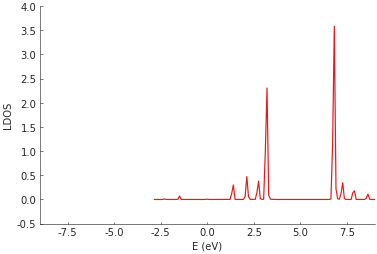

In [10]:
kpm=pb.kpm(model)
ldos = kpm.calc_ldos(energy=np.linspace(-9, 9, 200), broadening=0.05, position=[0, 0])
ldos.plot()
plt.show()

Computing KPM moments...
Progress 100% [////////////////////////////////] Elapsed: 0:00:00 / ETA: 0:00:00


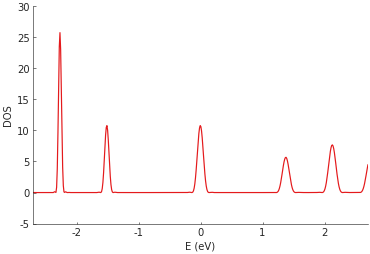

In [11]:
kpm = pb.kpm(model)

dos = kpm.calc_dos(energy=np.linspace(-2.7, 2.7, 500), broadening=0.06, num_random=16)
dos.plot()